# 01. 차원축소
---
* 날짜:
* 이름:

```
import numpy as np
import matplotlib.pyplot as plt
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use("ggplot")

## **개념정리**






---
### **샘플 공간**
---

#### **1차원**



||국어(x)|
|--|--|
|**sample 1**| 100|
|**sample 2**| 45|
|**sample 3**| 60|
|**sample 4**| 85|

* 전체 데이터셋 $D$의 shape?

In [7]:
D1 = np.array([100, 45, 60, 85]).reshape(4,1)
print(D1, D1.shape)

[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)


* 샘플 한개 $x_i$ 의 shape?

In [9]:
for xi in D1:
  #xi = D1[0]
  print(xi, xi.shape)

[100] (1,)
[45] (1,)
[60] (1,)
[85] (1,)


* $x_i$ 샘플 공간의 차원은?

In [11]:
print(xi)
len(xi)

[85]


1

* 샘플공간 시각화

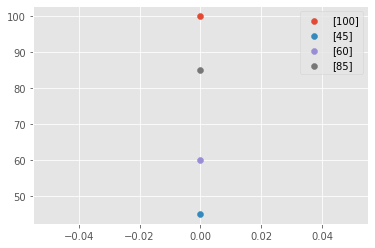

In [20]:
#plt.scatter([0,0,0,0], D1)
for xi in D1:
  plt.scatter(0, xi, label=xi)
plt.legend()
plt.show()

#### **2차원**


||국어(x)|수학(y)|
|--|--|--|
|**sample 1**| 100| 90 | 
|**sample 2**| 45| 50 | 
|**sample 3**| 60| 70 |
|**sample 4**| 85| 80 | 

In [41]:
D2 = np.array([[100, 45, 60, 85], [90, 50, 70, 80]]).swapaxes(0,1)
print(D2, D2.shape)

[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)


* 샘플 한개 $x_i$ 의 shape?

In [26]:
for xi in D2:
  print(xi, xi.shape)

[100  90] (2,)
[45 50] (2,)
[60 70] (2,)
[85 80] (2,)


* $x_i$ 샘플 공간의 차원은?

In [28]:
xi = D2[1]
len(xi)

2

* 샘플공간 시각화

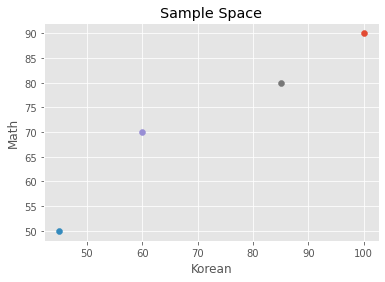

In [31]:
for xi in D2:
  x = xi[0]
  y = xi[1]
  plt.scatter(x, y)

plt.title("Sample Space")
plt.xlabel("Korean")
plt.ylabel("Math")
plt.show()

#### **3차원**
||국어|수학|영어|
|--|--|--|--|
|**sample 1**| 100| 90 | 90 |
|**sample 2**| 45| 50 | 60 |
|**sample 3**| 60| 70 | 65 |
|**sample 4**| 85| 80 | 90 |

In [33]:
D3 = np.array([[100, 45, 60, 85], [90, 50, 70, 80], [90,60,65,90]]).swapaxes(0,1)
print(D3, D3.shape)

[[100  90  90]
 [ 45  50  60]
 [ 60  70  65]
 [ 85  80  90]] (4, 3)


* 샘플 한개 $x_i$ 의 shape?

In [34]:
for xi in D3:
  print(xi.shape)

(3,)
(3,)
(3,)
(3,)


* $x_i$ 샘플 공간의 차원은?

In [35]:
for xi in D3:
  print(len(xi))

3
3
3
3


* 샘플공간 시각화

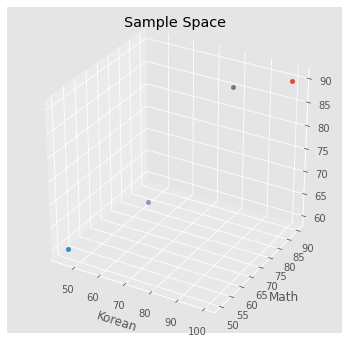

In [38]:
from mpl_toolkits.mplot3d import Axes3D
Axes3D

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

for xi in D3:
  x = xi[0]
  y = xi[1]
  z = xi[2]
  ax.scatter(x, y, z)

plt.title("Sample Space")
plt.xlabel("Korean")
plt.ylabel("Math")
#plt.zlabel("English")
plt.show()

---
### **차원 축소**
---


#### **모델**

![](https://github.com/yebiny/Lecture-Python-MachinLearning/blob/main/imgs/02-1.png?raw=true)


인풋 행렬 $X$ 에 대해 행렬 $W=(w_1, w_2)$를 곱한후 반환하는 모델을 만들어 봅시다

In [39]:
def reduction_model(X, w1=0, w2=0):
  W = np.array([[w1],[w2]])
  Z = np.matmul(X, W)
  return Z

#### **$W = (0,1)$**

* 데이터 변환

In [43]:
Z = reduction_model(D2, w1=0, w2=1)
print(D2, D2.shape)
print(Z, Z.shape)

[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)
[[90]
 [50]
 [70]
 [80]] (4, 1)


* 샘플공간(Z) 시각화

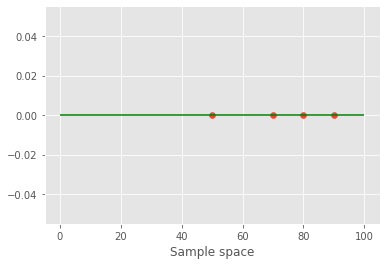

In [47]:
plt.hlines(0, xmin=0, xmax=100, color='g')
plt.scatter(Z, [0,0,0,0])
plt.xlabel("Sample space")
plt.show()

#### **$W = (1,0)$**

* 차원축소

In [48]:
Z2 = reduction_model(D2, w1=1, w2=0)
print(D2, D2.shape)
print(Z2, Z2.shape)

[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)
[[100]
 [ 45]
 [ 60]
 [ 85]] (4, 1)


* 샘플공간 시각화

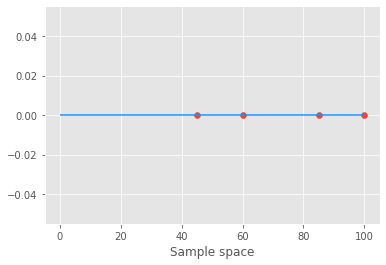

In [51]:
plt.hlines(0, xmin=0, xmax=100, color='dodgerblue')
plt.scatter(Z2, [0,0,0,0])
plt.xlabel("Sample space")
plt.show()

#### **$W = (1,1)$**

* 차원축소

In [52]:
Z3 = reduction_model(D2, w1=1, w2=1)
print(D2, D2.shape)
print(Z3, Z3.shape)

[[100  90]
 [ 45  50]
 [ 60  70]
 [ 85  80]] (4, 2)
[[190]
 [ 95]
 [130]
 [165]] (4, 1)


* 샘플공간 시각화

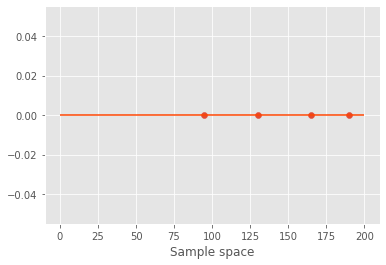

In [54]:
plt.hlines(0, xmin=0, xmax=200, color='orangered')
plt.scatter(Z3, [0,0,0,0])
plt.xlabel("Sample space")
plt.show()

---
### **투영(Projection)**
---

* 시각화

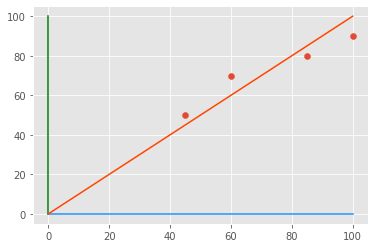

In [60]:
x_col = D2[:,0]
y_col = D2[:,1]

plt.scatter(x_col, y_col)

# w1=0, w2=1
# x=0
plt.plot([0, 0], [0, 100], 'g')

# w1=1, w2=0
# y=0 
plt.plot([0, 100], [0, 0], 'dodgerblue')

# w1=1, w2=1
# y = (1/1)x -> y=x
plt.plot([0, 100], [0, 100], 'orangered')


---
## **실습**
---


### **매니폴드 학습**

`sklearn` 라이브러리를 을 이용해 매니폴드 학습을 진행해봅니다.

```
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D
```

In [61]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

mpl_toolkits.mplot3d.axes3d.Axes3D

#### **Data**

* 데이터 불러오기

In [67]:
X, Y = datasets.make_swiss_roll(n_samples=2000)
print(X[0], X.shape)
print(Y[0], Y.shape)

[ 1.94775887 19.68612881 -4.7176689 ] (2000, 3)
5.103936171589798 (2000,)


* 데이터 시각화

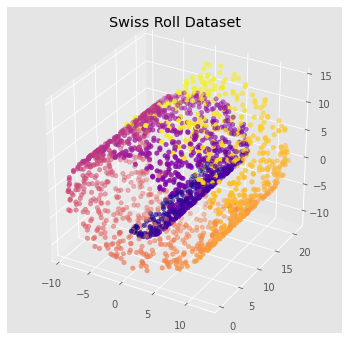

In [69]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.scatter(x, y, z, c=Y, cmap='plasma')
plt.title("Swiss Roll Dataset")
plt.show()

#### **알고리즘: Locally Linear Embedding (LLE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.locally_linear_embedding.html?highlight=lle

* 알고리즘 소개
  * 비지도 학습에 해당하며 차원축소 기법 중 투영이 아닌 매니폴드 학습
  * 입력 데이터셋을 낮은 차원의 좌표계로 매핑하는 알고리즘


* manifold 학습

In [71]:
Z, error = manifold.locally_linear_embedding(X, n_neighbors=12, n_components=2)
print(Z.shape)

(2000, 2)


* 결과 시각화

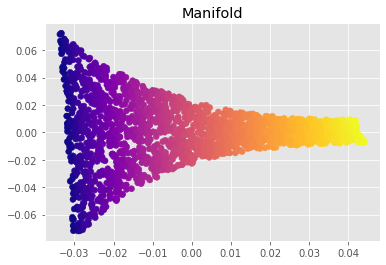

In [72]:
x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

## **과제**

---
### **과제 01**
---
1. 스위스롤 데이터에 다양한 `manifold` 알고리즘을 사용하고 시각화 하세요
2. 각 알고리즘에 대해 간략하게 정보를 정리하세요

#### **Multi-Dimensional Scaling (MDS)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html#sklearn.manifold.MDS

* 알고리즘 사용 및 시각화

[ 6.05124928 16.52946547  2.96557905] (500, 3)
6.738863177629063 (500,)


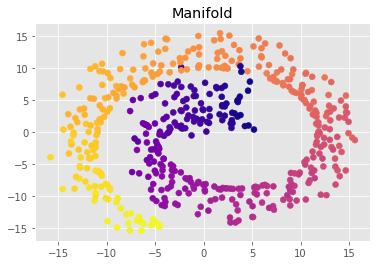

In [11]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

mds = manifold.MDS(n_components=2)
Z = mds.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .
  * .

#### **t-Stochastic Neighbor Embedding (t-SNE)**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNE

* 알고리즘 사용 및 시각화

[-9.37177634  0.28470553 -2.40859871] (500, 3)
9.676339155251274 (500,)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


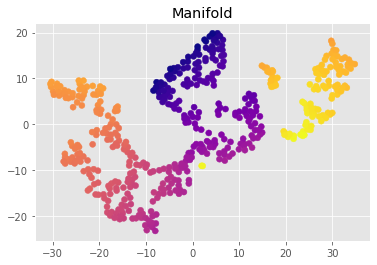

In [10]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
Z = tsne.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .
  * .

#### **ISOMAP**

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html?highlight=isomap#sklearn.manifold.Isomap

* 알고리즘 사용 및 시각화

[ 8.94577772  0.41287561 -7.77299138] (500, 3)
11.85100561781191 (500,)


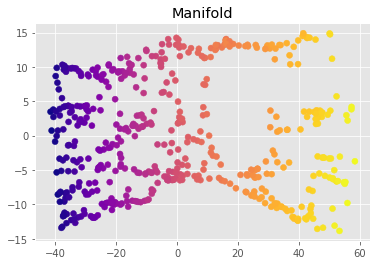

In [22]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_swiss_roll(n_samples=500)
print(X[0], X.shape)
print(Y[0], Y.shape)

iso = manifold.Isomap(n_components=2)
Z = iso.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold")
plt.show()

* **알고리즘 소개**
  * .
  * .

---
### **과제 02**
---

스위스롤 데이터가 아닌 S커브 데이터 `make_s_curve()`를 이용해 `manifold`를 수행 해 보세요

[0.32071967 0.20561355 1.94717416] (1000, 3)
-3.468081852269448 (1000,)


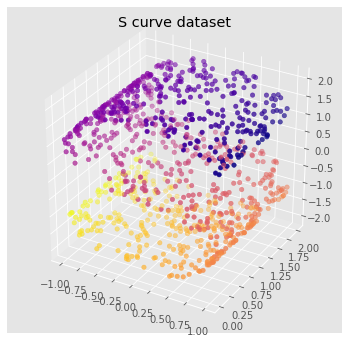

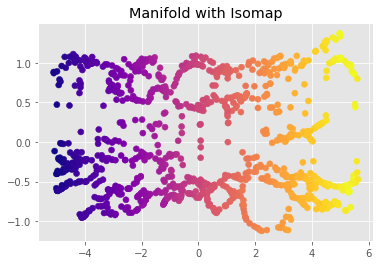

In [23]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

X, Y = datasets.make_s_curve(n_samples=1000)
print(X[0], X.shape)
print(Y[0], Y.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection="3d")
x = X[:,0]
y = X[:,1]
z = X[:,2]
ax.scatter(x, y, z, c=Y, cmap='plasma')
plt.title("S curve dataset")
plt.show()


iso = manifold.Isomap(n_components=2)
Z = iso.fit_transform(X)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y, cmap='plasma')
plt.title("Manifold with Isomap")
plt.show()

---
### **과제 03**
---

다음 데이터셋 중 하나를 선택해 불러옵니다.
* 펭귄 데이터
* 와인 데이터
* 축구 예측 데이터

간단한 전처리 후 LLE를 이용해 2차원으로 차원축소하고 시각화 하세요. LLE를 사용하기 위해서는 데이터프레임 형식을 넘파이 배열로 바꿔줘야 하는 것에 주의하세요

* 데이터 로드

In [79]:
import seaborn as sns

In [95]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


* X는 종("species") 속성을 제외합니다.

In [96]:
X = df.drop(["species"], axis=1)
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Torgersen,36.7,19.3,193.0,3450.0,Female


* 섬(island) 속성을 0, 1, 2로 변경

In [97]:
print(set(X["island"]))
for i, island in enumerate(set(X["island"])):
  mask = X["island"]==island
  X.loc[mask, "island"]=i
X.head()

{'Torgersen', 'Biscoe', 'Dream'}


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,Male
1,0,39.5,17.4,186.0,3800.0,Female
2,0,40.3,18.0,195.0,3250.0,Female
3,0,NaN,NaN,NaN,NaN,NaN
4,0,36.7,19.3,193.0,3450.0,Female


* 섬별(sex) 속성을 0, 1로 변경

In [98]:
print(set(X["sex"]))
for i, island in enumerate(["Female", "Male"]):
  print(island)
  mask = X["sex"]==island
  X.loc[mask, "sex"]=i
X.head()

{nan, 'Female', 'Male'}
Female
Male


,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.1,18.7,181.0,3750.0,1
1,0,39.5,17.4,186.0,3800.0,0
2,0,40.3,18.0,195.0,3250.0,0
3,0,NaN,NaN,NaN,NaN,NaN
4,0,36.7,19.3,193.0,3450.0,0


* 결측값 확인

In [99]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     342 non-null    float64
 2   bill_depth_mm      342 non-null    float64
 3   flipper_length_mm  342 non-null    float64
 4   body_mass_g        342 non-null    float64
 5   sex                333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 16.2+ KB


* 수치형 자료들의 결측값은 평균으로 대체

In [100]:
for col in ['bill_length_mm',	'bill_depth_mm',	'flipper_length_mm',	'body_mass_g']:
  X[col] = X[col].fillna(X[col].median())
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.10,18.7,181.0,3750.0,1
1,0,39.50,17.4,186.0,3800.0,0
2,0,40.30,18.0,195.0,3250.0,0
3,0,44.45,17.3,197.0,4050.0,NaN
4,0,36.70,19.3,193.0,3450.0,0


* 성별 결측치는 임의로 0로 대체(그냥 샘플 하나를 제거해도 괜찮습니다.)

In [101]:
X["sex"] = X["sex"].fillna(0)
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,39.10,18.7,181.0,3750.0,1
1,0,39.50,17.4,186.0,3800.0,0
2,0,40.30,18.0,195.0,3250.0,0
3,0,44.45,17.3,197.0,4050.0,0
4,0,36.70,19.3,193.0,3450.0,0


In [102]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   island             344 non-null    object 
 1   bill_length_mm     344 non-null    float64
 2   bill_depth_mm      344 non-null    float64
 3   flipper_length_mm  344 non-null    float64
 4   body_mass_g        344 non-null    float64
 5   sex                344 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 16.2+ KB


In [103]:
X_np = X.to_numpy()
X_np.shape

(344, 6)

In [111]:
Y = df["species"]
Y_np = Y.to_numpy()
Y_np.shape

(344,)

In [113]:
print(set(Y))
Y_np[Y_np=="Chinstrap"]=0
Y_np[Y_np=="Gentoo"]=1
Y_np[Y_np=="Adelie"]=2

{'Chinstrap', 'Gentoo', 'Adelie'}


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


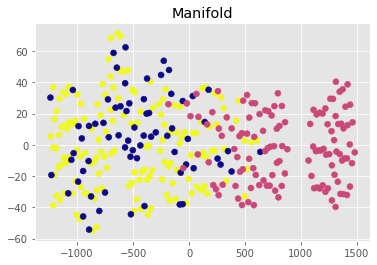

In [118]:
from sklearn import manifold, datasets
from mpl_toolkits.mplot3d import Axes3D
Axes3D

tsne = manifold.TSNE(n_components=2, init="pca", random_state=0)
Z = tsne.fit_transform(X_np)

x = Z[:,0]
y = Z[:,1]
plt.scatter(x, y, c=Y_np, cmap='plasma')
plt.title("Manifold")
plt.show()